# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [2]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].count()
mouse_count

1893

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
print(duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(keep="first")

# Print the cleaned DataFrame
print(cleaned_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Checking the number of mice in the clean DataFrame.
#unique_mice_count_combined = combined_data["Mouse ID"].nunique()----I got 249 instead of the shown 248 output. 
#print("Number of unique mice in the combined_data DataFrame:", unique_mice_count_combined)
##correcting for additional record##
unique_mice_count_cleaned = len(cleaned_data["Mouse ID"].unique())
print("Number of unique mice in the cleaned_data DataFrame:", unique_mice_count_cleaned)


Number of unique mice in the cleaned_data DataFrame: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#use cleaned data and groupby to create data to work from
grouped_data = cleaned_data.groupby("Drug Regimen")
#calc the mean of tumor volume by drug regimen
median_volume = grouped_data["Tumor Volume (mm3)"].median()
#calc the variance of tumor volume by drug regimen
variance_volume = grouped_data["Tumor Volume (mm3)"].var()
#calc the std. of the tumor volume by drug regimen
std_volume = grouped_data["Tumor Volume (mm3)"].std()
#calculate maan of tumor volume by regimen 
mean_volume = grouped_data["Tumor Volume (mm3)"].median()
#calc stand error of the mean for tumor volume by drug regimen
sem_volume = grouped_data["Tumor Volume (mm3)"].sem()

#assemble a data frame from these statistics for drug regimens
summary_stats_df = pd.DataFrame({"Mean": mean_volume, "Median": median_volume,
    "Variance": variance_volume, "Standard Deviation": std_volume,"SEM": sem_volume})

summary_stats_df.head(10)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,41.557809,41.557809,24.947764,4.994774,0.329346
Ceftamin,51.776157,51.776157,39.290177,6.268188,0.469821
Infubinol,51.820584,51.820584,43.128684,6.567243,0.492236
Ketapril,53.698743,53.698743,68.553577,8.279709,0.603860
Naftisol,52.509285,52.509285,66.173479,8.134708,0.596466
Placebo,52.288934,52.288934,61.168083,7.821003,0.581331
Propriva,50.909965,50.909965,42.278090,6.502160,0.514041
Ramicane,40.673236,40.673236,23.486704,4.846308,0.320955
Stelasyn,52.431737,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean",
                                     "median", "var", "std", "sem"])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

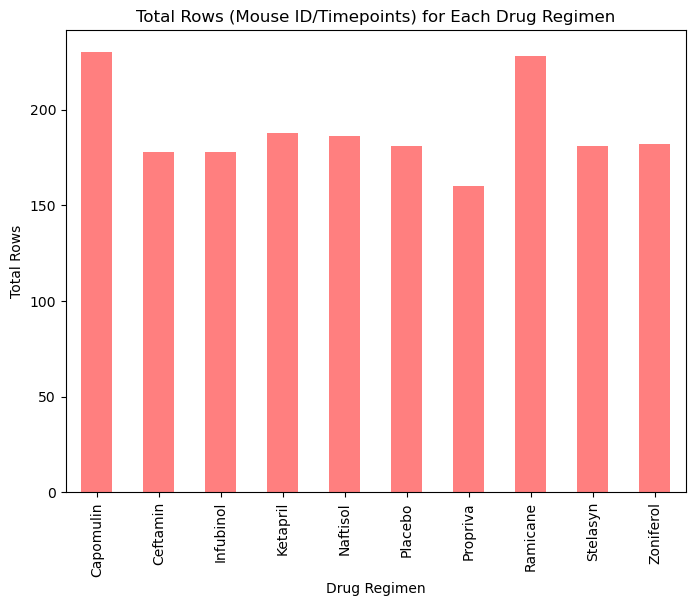

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data.groupby("Drug Regimen").size()
regimen_counts.plot(kind="bar", figsize=(8, 6), color="red", alpha=0.5)
plt.title("Total Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Rows")
plt.show()

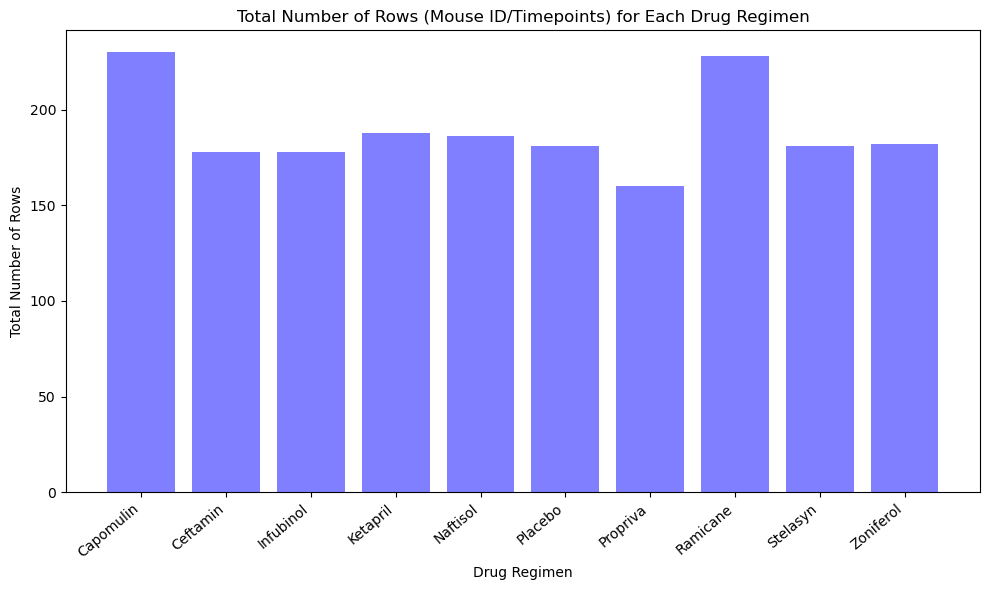

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by "Drug Regimen" and count the number of rows in each group
regimen_counts = cleaned_data.groupby("Drug Regimen")["Mouse ID"].count()
regimen_names = regimen_counts.index
counts = regimen_counts.values
# Create a bar plot using pyplot
plt.figure(figsize=(10, 6
                    ))
plt.bar(regimen_names, counts, color="blue", alpha=0.5)
# assigning Title and labels
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")

plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()


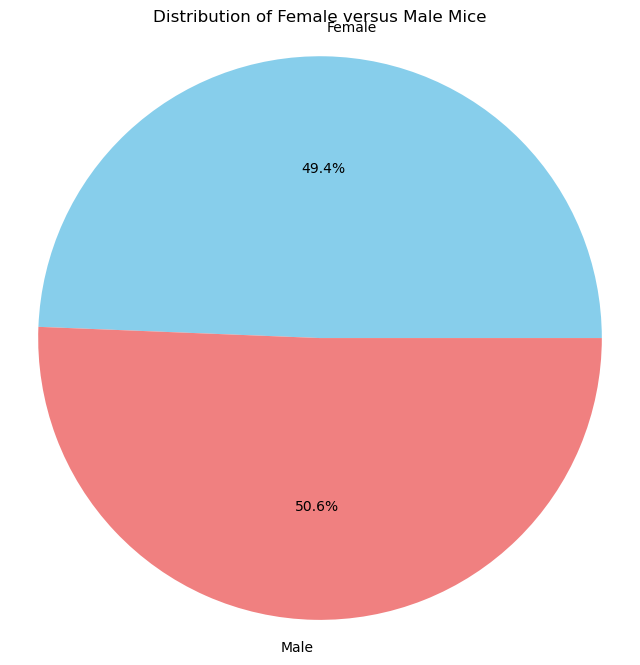

In [11]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = cleaned_data.groupby("Sex").size()

# Create a pie plot
sex_distribution.plot(kind="pie", figsize=(8, 8), autopct="%1.1f%%", colors=["skyblue", "lightcoral"])

# Add title
plt.title("Distribution of Female versus Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Show the plot
plt.show()

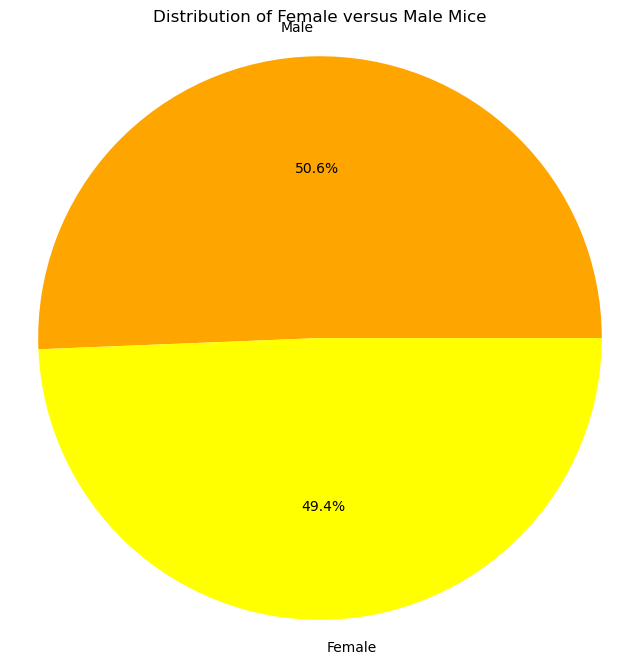

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pysex_distribution = cleaned_data["Sex"].value_counts()
#plot it and add title
plt.figure(figsize=(8, 8))
plt.pie(pysex_distribution.values, labels=pysex_distribution.index, autopct="%1.1f%%", colors=["orange", "yellow"])
plt.title("Distribution of Female versus Male Mice")
#fix the pie so it appears circular
plt.axis("equal")
#print the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Get the latest timepoint for each mouse-they are in chron. order
max_time = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group DataFrame with the original for tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_time, cleaned_data, on=["Mouse ID", "Timepoint"], how="inner")

# Filter the Data to only the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = final_tumor_volume[(final_tumor_volume["Drug Regimen"] == "Capomulin") |
                (final_tumor_volume["Drug Regimen"] == "Ramicane") |
                (final_tumor_volume["Drug Regimen"] == "Infubinol") |
                (final_tumor_volume["Drug Regimen"] == "Ceftamin")]

# Display the DataFrame
print(final_tumor_volume)




    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
239     y769         45     Ceftamin  Female           6          27   
240     y793         45    Capomulin    Male          17          17   
241     y865         45     Ceftamin    Male          23          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3  

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

remedies = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to append to thru the iterations
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for remedy in remedies:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = cleaned_data.loc[(cleaned_data["Drug Regimen"] == remedy) & 
                                     (cleaned_data["Timepoint"] == cleaned_data.groupby("Mouse ID")
                                    ["Timepoint"].transform("max")),"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    #display any potential outliers
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Potential outliers for {remedy}: {potential_outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


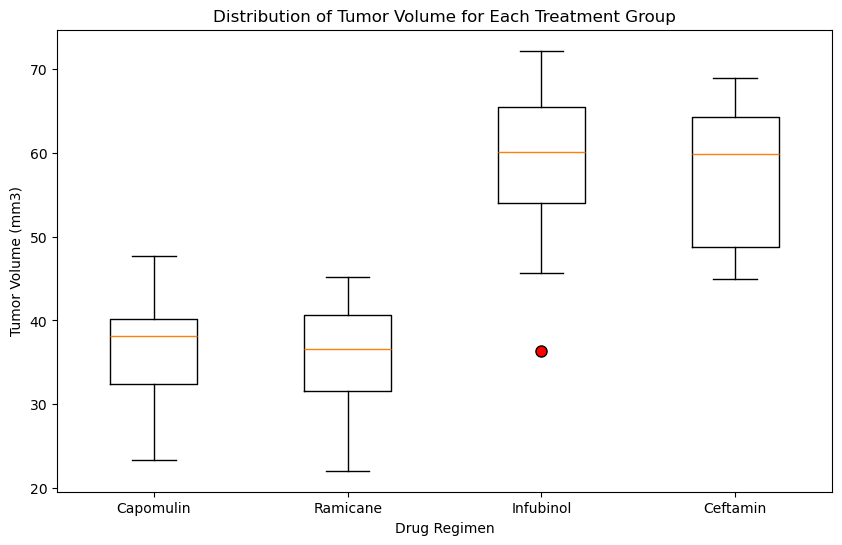

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=remedies, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

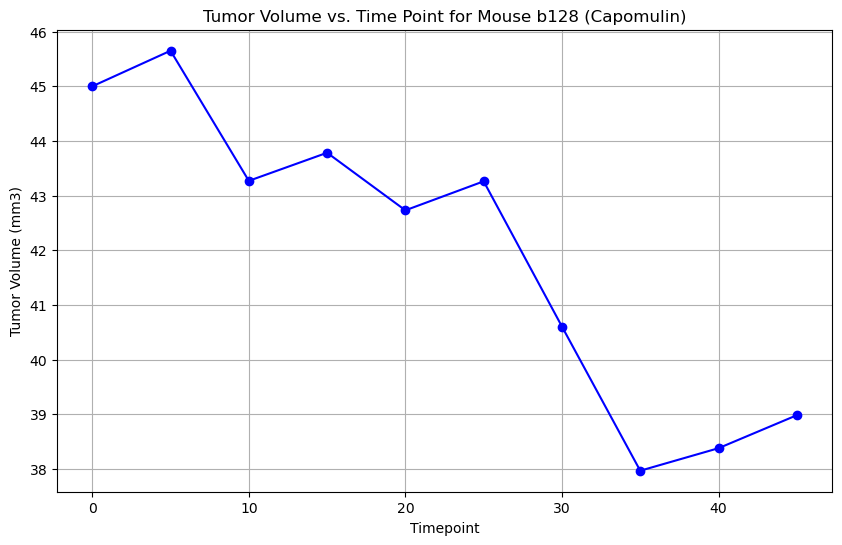

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the cleaned_data DataFrame to include only mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Choose a different mouse treated with Capomulin
mouse_id = "b128"  # Choosing a different mouse ID

# Filter data for the selected mouse
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Plot tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b')

# Add labels and title
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

# Show plot
plt.show()

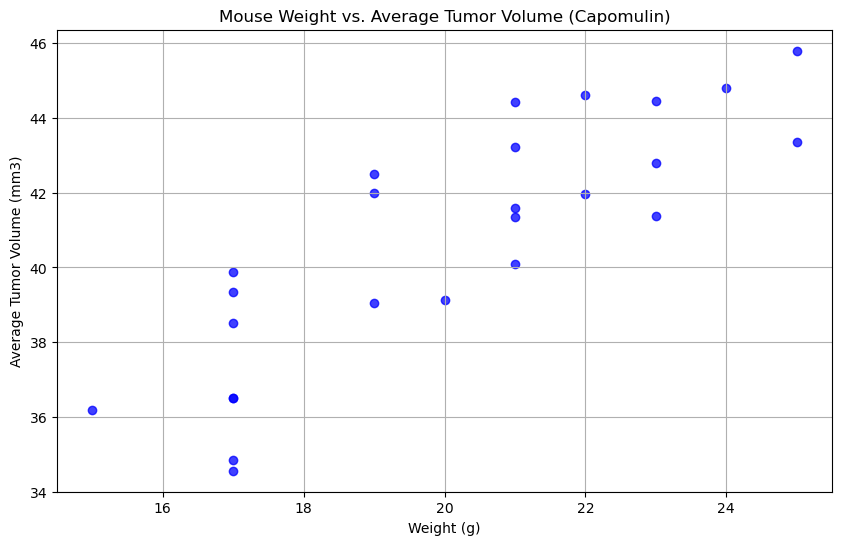

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filter the cleaned_data DataFrame to include only mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Step 2: Group the filtered data by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Step 3: Merge the average tumor volume data with the mouse metadata DataFrame to get the corresponding weights
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on="Mouse ID")

# Step 4: Plot the mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"], color='b', alpha=0.75)

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

# Show plot
plt.show()

## Correlation and Regression

Correlation Coefficient: PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


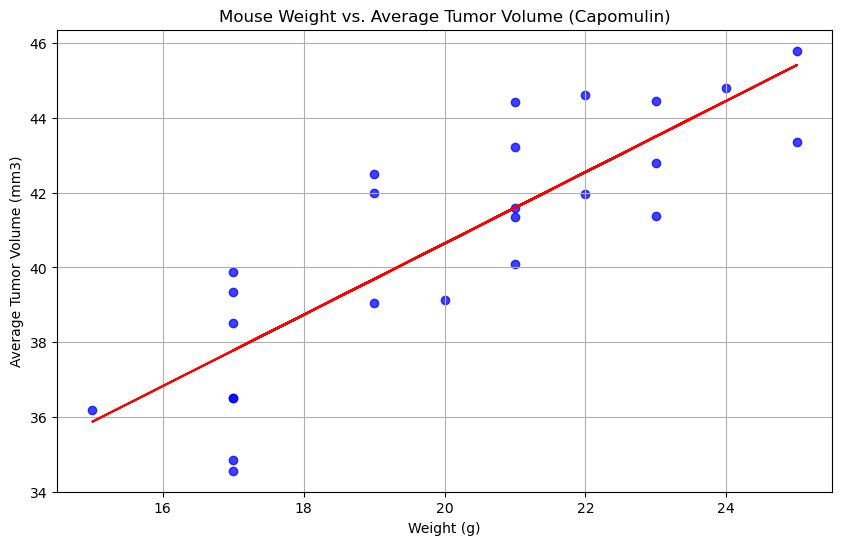

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-value: 0.8419363424694721


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculating the correlation coefficient
correlation_coefficient = pearsonr(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])
print(f"Correlation Coefficient: {correlation_coefficient}")

# do the linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# Plot my inear regression line and add labels/title
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"], color='b', alpha=0.75)
plt.plot(merged_data["Weight (g)"], slope * merged_data["Weight (g)"] + intercept, color='r') 
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

# plot it.
plt.show()

# Printing slope, y-intercept, and r-value
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")

In [19]:
# Calculate the p-value for the correlation coefficient for statistical significance and understanding. 
# this strongly suggests that we can reject Ho: "there is no correlation between weight and tumor size"
p_value_corr = pearsonr(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])[1]
print(f"P-value (Correlation): {p_value_corr}")

P-value (Correlation): 1.3225722434712605e-07
